### 시각화 라이브러리 꺼내오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Line plot

#### plot 함수
- 선 그래프를 그려주는 함수

In [2]:
np.random.seed(3)
x = np.arange(1,6) # 1 ~ 5
y = np.random.randint(1, 10, size=5)
print(x)
print(y)

[1 2 3 4 5]
[9 4 9 9 1]


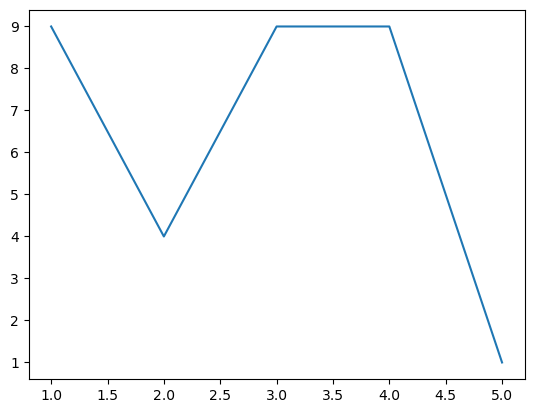

In [3]:
plt.plot(x, y)
plt.show() # 그래프를 그려줘

#### Line plot 다양한 옵션들

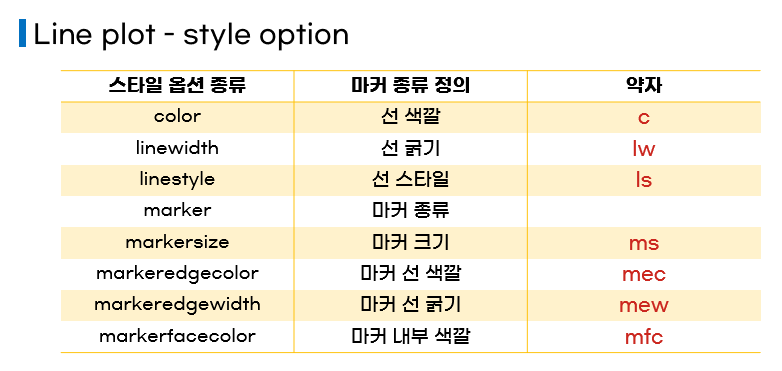
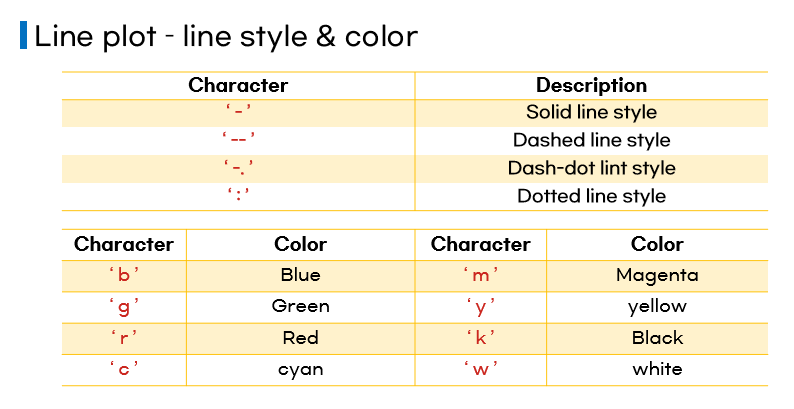
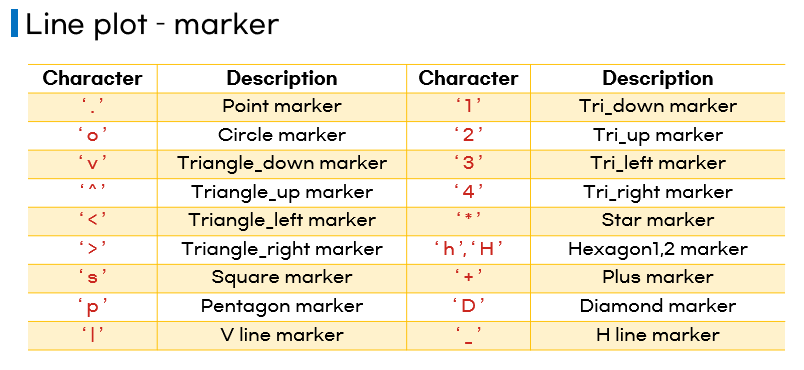

In [4]:
# matplotlib 에서 지원되는 색상 목록
# https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors  doc제공 코드
import math
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

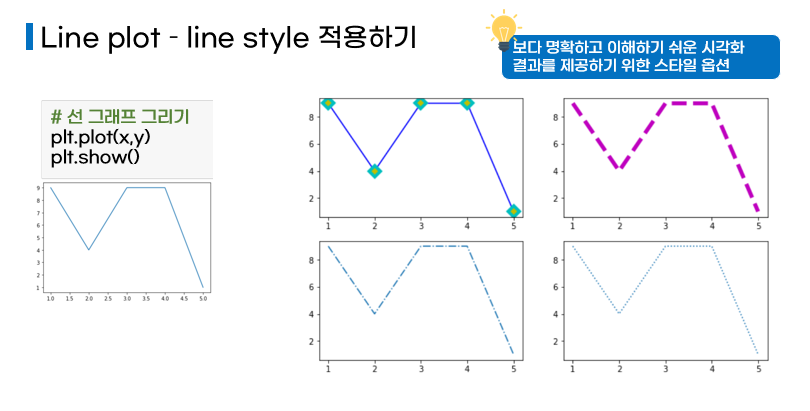

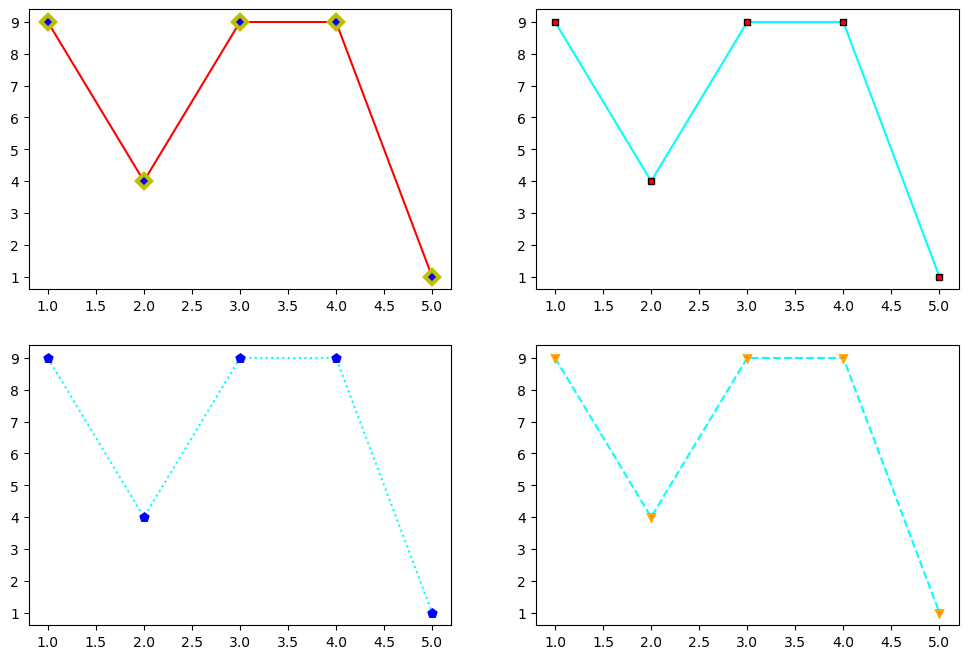

In [5]:
# 선 스타일 변경해보기
plt.figure(figsize = (12,8))
plt.subplot(2,2,1) # 2행 2열의 1번째 그래프
plt.plot(x,y, ls = '-', color='r', marker = 'D', ms = 7, mec ='y', mew = 3, mfc='b')

plt.subplot(2,2,2)
plt.plot(x,y, ls = '-', color ='cyan', marker='s', ms = 5, mec = 'black', mew = 1,mfc ='r')

plt.subplot(2,2,3)
plt.plot(x,y, ls = ':', color ='cyan', marker='p', ms = 3, mec = 'b', mew = 4,mfc ='r')

plt.subplot(2,2,4)
plt.plot(x,y, ls = '--', color ='cyan', marker='v', ms = 4, mec = 'orange', mew = 2,mfc ='r')

plt.show()

#### show() 사용하기

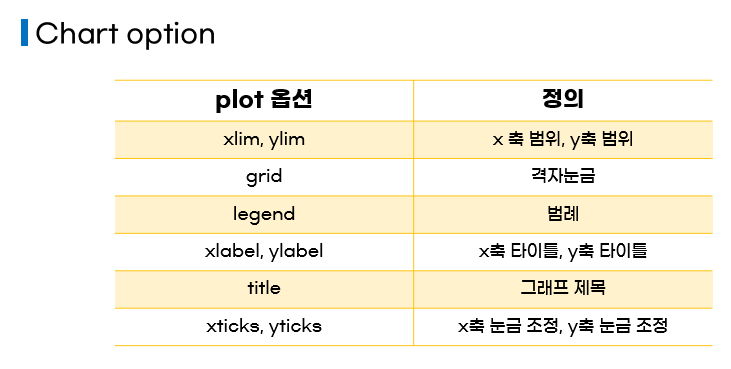

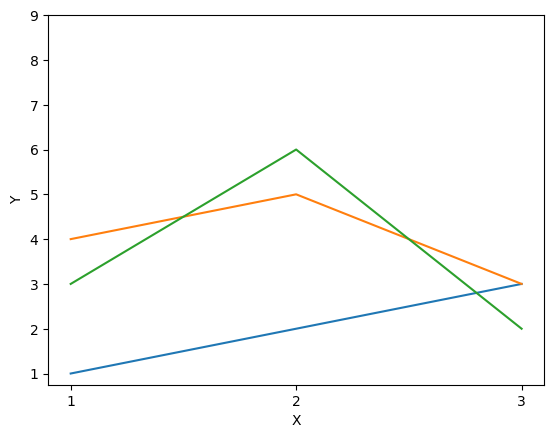

In [6]:
# 여러개의 그래프를 한 창에 그리기
x = np.arange(1, 4) # 1, 2, 3, 4
y1 = np.array([1,2,3])
y2 = np.array([4,5,3])
y3 = np.array([3,6,2])

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.xticks(range(1,4))
plt.yticks(range(1,10))
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

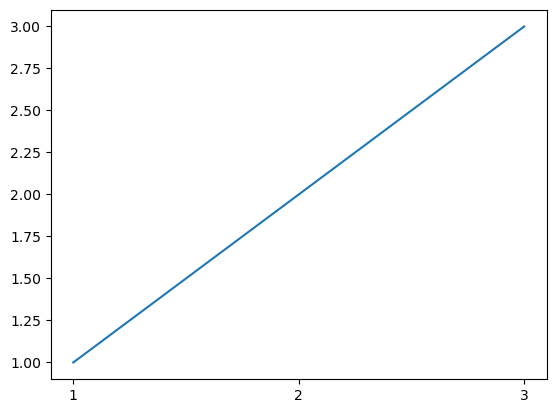

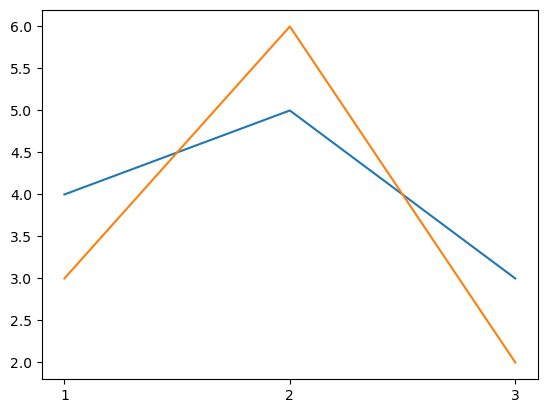

In [7]:
# 여러 창으로 그래프를 나눠서 그리기
plt.plot(x,y1)
plt.xticks(x)
plt.show()

plt.plot(x,y2)
plt.plot(x,y3)
plt.xticks(x)
plt.show()

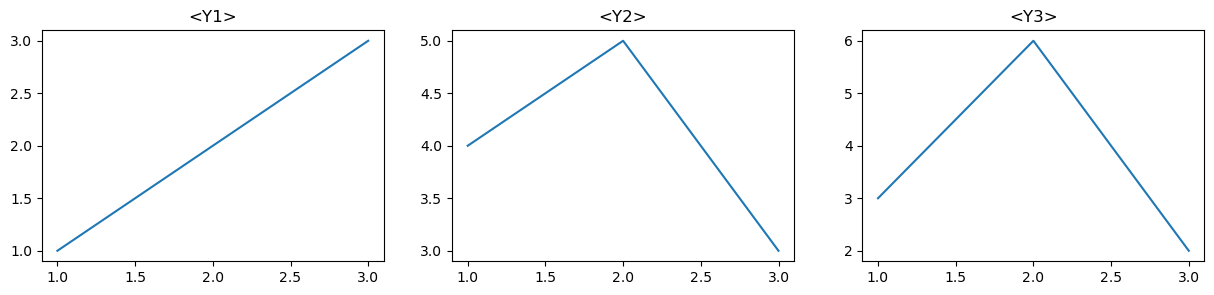

In [8]:
# subplot --> 1창에 칸을 나눠서 3개의 그래프를 표현

plt.figure(figsize = (15, 3))
plt.subplot(1,3,1)
plt.plot(x,y1)
plt.title('<Y1>')
plt.subplot(1,3,2)
plt.plot(x,y2)
plt.title('<Y2>')
plt.subplot(1,3,3)
plt.plot(x,y3)
plt.title('<Y3>')
plt.show()

#### 인구데이터 실습
- kosis 국가통계포털 장래 인구변동 데이터
- 년도별 출생아수, 사망자수 정보를 가지고와서 line plot 시각화

In [9]:
data = pd.read_csv('./data/장래_인구변동_KOSIS.csv', encoding='euc_kr', index_col='인구변동요인별')
data

,2020,2030,2040,2050,2060,2070
인구변동요인별,,,,,,
인구(천명),51836,51199,50193,47359,42617,37656
출생아수(천명),275,305,286,236,181,196
사망자수(천명),308,408,527,680,741,702


In [10]:
# 데이터 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 인구(천명) to 사망자수(천명)
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2020    3 non-null      int64
 1   2030    3 non-null      int64
 2   2040    3 non-null      int64
 3   2050    3 non-null      int64
 4   2060    3 non-null      int64
 5   2070    3 non-null      int64
dtypes: int64(6)
memory usage: 168.0+ bytes


In [11]:
data.index

Index(['인구(천명)', '출생아수(천명)', '사망자수(천명)'], dtype='object', name='인구변동요인별')

In [12]:
data.iloc[1]

2020    275
2030    305
2040    286
2050    236
2060    181
2070    196
Name: 출생아수(천명), dtype: int64

In [32]:
x = range(2020,2071,10)
# 출생아수 데이텁 접근
Y1 = data.iloc[1].values
# 사망자수 데이터 접근
Y2 = data.iloc[2].values



In [33]:
display(x, Y1,Y2)


range(2020, 2071, 10)

array([275, 305, 286, 236, 181, 196], dtype=int64)

array([308, 408, 527, 680, 741, 702], dtype=int64)

In [34]:
# 한글 출력하기위해 설정
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

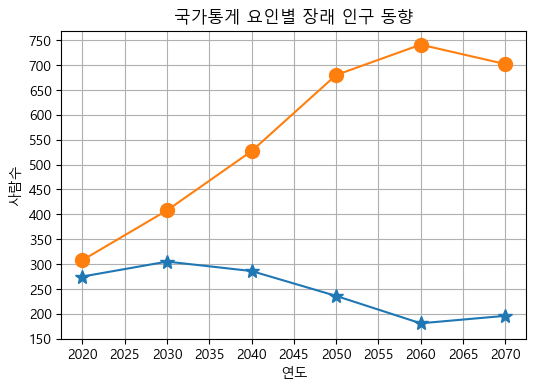

In [35]:
plt.figure(figsize=(6, 4))
plt.title('국가통게 요인별 장래 인구 동향')


plt.plot(x, Y1, marker='*', ms=10, label ='출생아수(천명)')

plt.plot(x, Y2, marker='o', ms=10, label ='사망자수(천명)')
plt.grid()
plt.xlabel('연도')
plt.ylabel('사람수')
plt.xticks(range(2020,2071,5))
plt.yticks(range(150,800,50))

plt.show()

### Bar chart
- 막대 그래프

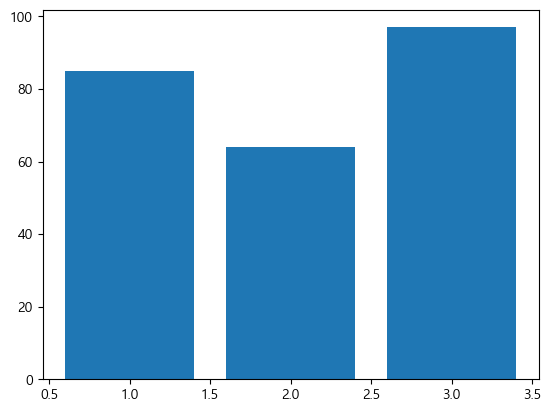

In [38]:
bar_x = np.arange(1,4)
np.random.seed(5)
bar_y = np.random.randint(50,100,size =3)

plt.bar(bar_x,bar_y)
plt.show()

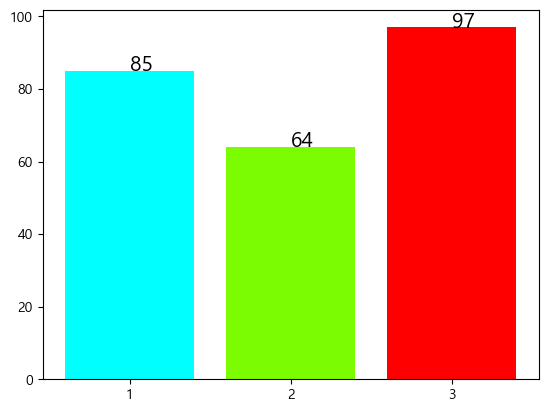

In [49]:
# 그래프 옵션 추가
# 막대그래프 색상 변경, 텍스트 출력
plt.bar(bar_x, bar_y, color=['cyan','lawngreen','r'])
for i in range(len(bar_x)):
    plt.text(bar_x[i], bar_y[i], f'{bar_y[i]}', fontdict={'color' : 'black', 'size' : 15})
    
plt.xticks(range(1,4))
plt.show()

### 최종 예제 : 전국교통사고(2017) 데이터 시각화
- 1. 요일별 교통사고 시각화 - bar
- 2. 차대차 사건 중 죽거나 다친 사람이 많은 발생지 시도 시각화 - bar
- 3. 교통사고가 많이 발생하는 시간대 시각화 - pie
- 4. 광주지역 법규위반 사항별 사고건수 시각화 - pie

In [50]:
# 전체 컬럼을 생략없이 모두 보기 설정
pd.set_option('display.max_columns', None)

In [53]:
# 데이터 불러오기
acc_data = pd.read_csv('./data/Traffic_Accident_2017.csv', encoding='euc-kr')
acc_data.head(3)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,전남,장성군,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,서울,송파구,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,충남,홍성군,차대차,추돌,추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069


In [56]:
# 데이터 정보확인
acc_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

#### 요일별 교통사고 건수 시각화

In [62]:
day = acc_data['요일'].value_counts()
day = day[['월','화','수','목','금','토','일']]
day

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

In [64]:
display(sns.color_palette('tab10'))
display(sns.color_palette("husl",10))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775)]

In [67]:
# WARNING 없애기
import warnings
warnings.filterwarnings(action = 'ignore')

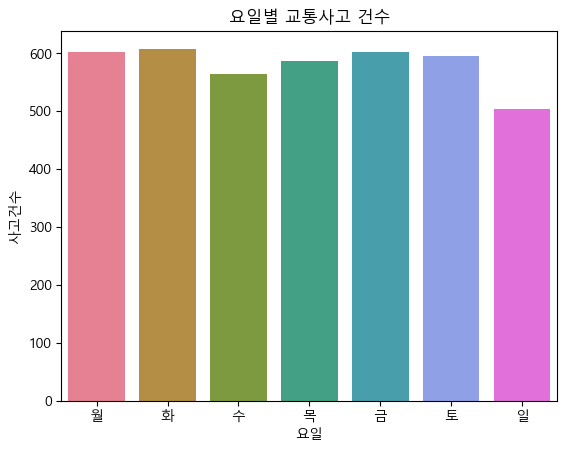

In [68]:
sns.barplot(day.index,day.values, palette="husl") # x = day.index, y = day.values
plt.title('요일별 교통사고 건수')
plt.ylabel('사고건수')
plt.xlabel('요일')
plt.show()

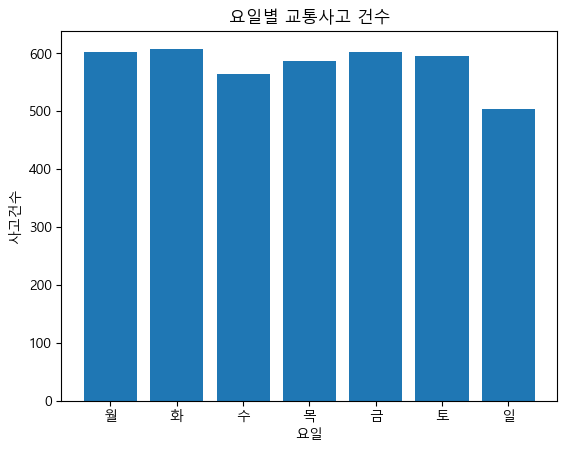

In [70]:
plt.bar(day.index,day)
plt.title('요일별 교통사고 건수')
plt.ylabel('사고건수')
plt.xlabel('요일')
plt.show()

#### 차대차 사건중 사상자가 많은 발생지 시도 시각화

In [71]:
acc_data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [74]:
np.unique(acc_data['사고유형_대분류'])

array(['차대사람', '차대차', '차량단독', '철길건널목'], dtype=object)

In [77]:
car_acc = acc_data.query('사고유형_대분류 == "차대차"')

In [82]:
s_car_acc = car_acc[['발생지시도', '사상자수']].groupby('발생지시도', as_index=False).sum()
s_car_acc

,발생지시도,사상자수
0,강원,214
1,경기,824
2,경남,248
3,경북,287
4,광주,87
5,대구,115
6,대전,61
7,부산,107
8,서울,197
9,세종,17


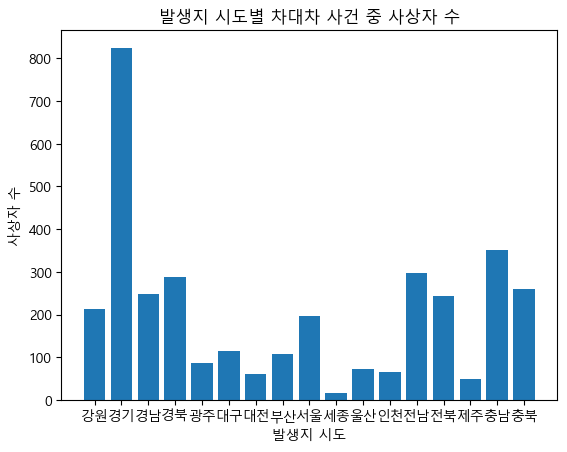

In [106]:
# 시각화
plt.bar(s_car_acc['발생지시도'],s_car_acc['사상자수'])
plt.title('발생지 시도별 차대차 사건 중 사상자 수')
plt.ylabel('사상자 수')
plt.xlabel('발생지 시도')
plt.show()

#### pie chart

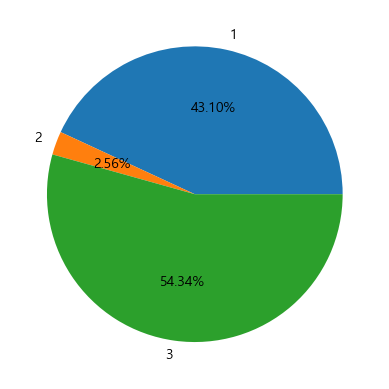

In [86]:
np.random.seed(2)
x = np.arange(1,4)
y = np.random.rand(3)

plt.pie(y, labels = x, autopct='%.2f%%')
plt.show()


#### 교통사고가 가장 많이 발생하는 시간대 시각화

In [88]:
acc_data['발생년월일시'] % 100 # 가장 마지막의 시간을 꺼내기위해 %연산

0        1
1        2
2        2
3        2
4        4
        ..
4060    18
4061    18
4062    19
4063    20
4064    23
Name: 발생년월일시, Length: 4065, dtype: int64

In [89]:
acc_time = acc_data['발생년월일시'] % 100

In [90]:
acc_time_cnt = acc_time.value_counts().sort_index()

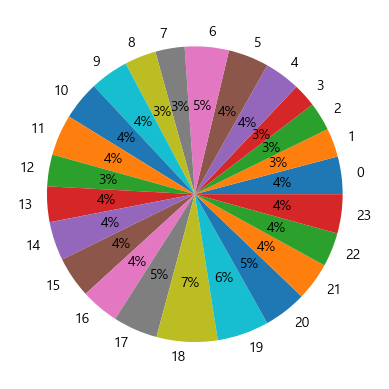

In [92]:
# 파이차트 시각화
plt.pie(acc_time_cnt, labels=acc_time_cnt.index, autopct='%1.0f%%')
plt.show()

In [93]:
# cut 함수를 이용하여 시간대를 8개의 카테고리로 나눠서 시각화
# 0 ~ 2, 3~5, 6~8, 9~11, 12~14, 15~17, 18~20, 21~23  : 24구간을 8구간으로 
bins = [-1, 2, 5, 8, 11, 14, 17, 20, 23]
labels = ['0 ~ 2', '3~5', '6~8', '9~11', '12~14', '15~17', '18~20', '21~23']

acc_time2 = pd.cut(acc_time, bins = bins, labels= labels)
acc_time2_cnt = acc_time2.value_counts()
acc_time2_cnt

18~20    692
15~17    550
9~11     526
21~23    494
12~14    472
6~8      466
3~5      444
0 ~ 2    421
Name: 발생년월일시, dtype: int64

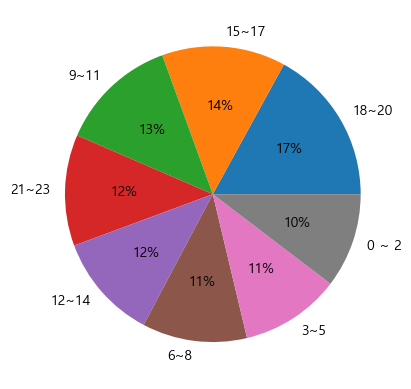

In [94]:
plt.pie(acc_time2_cnt, labels=acc_time2_cnt.index, autopct='%1.0f%%')
plt.show()

#### 광주지역 법규위반 사항별 사고건수 시각화

In [98]:
gj_data = acc_data.query('발생지시도 =="광주"')
gj_data2 = gj_data['법규위반'].value_counts()

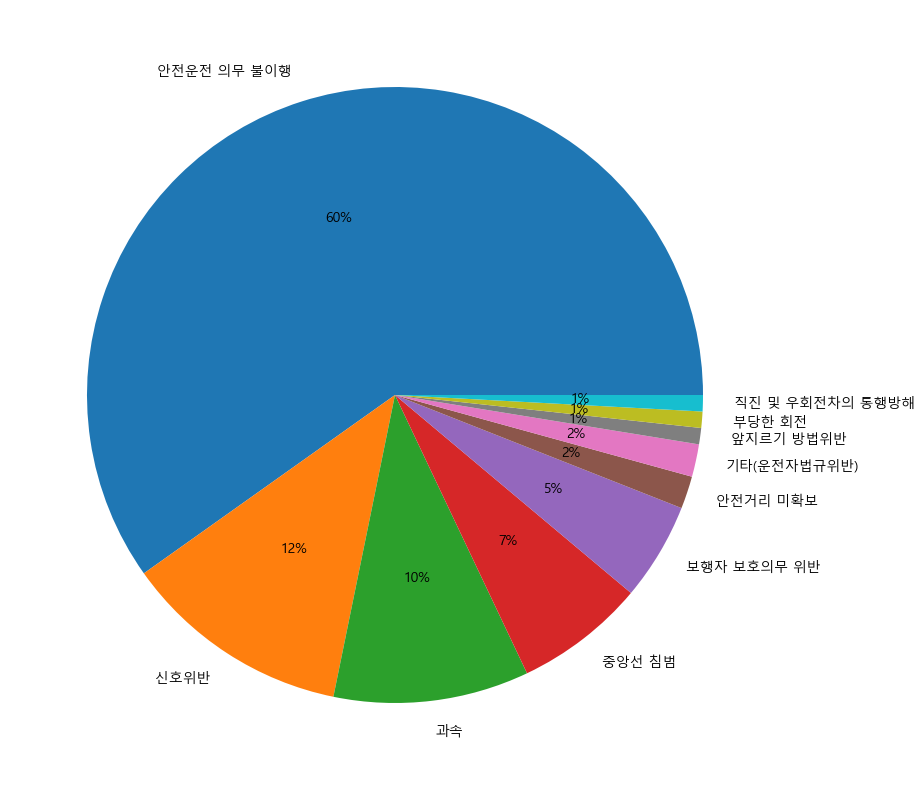

In [102]:
plt.figure(figsize=(10,10))
plt.pie(gj_data2, labels=gj_data2.index, autopct='%1.0f%%')
plt.show()